In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('CD-EAFC26-Men.csv')


X = data.drop(columns = 'OVR')

Y = data['OVR']

PF  = PolynomialFeatures(degree = 2)

x_PF = PF.fit_transform(X) 

x_train , x_test , y_train, y_test = train_test_split(x_PF , Y , test_size=0.2,random_state=44)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [4]:
model = LinearRegression()

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 0.11637308827253645
R²: 0.9974638679246027


Text(0.5, 1.0, 'Actual vs Predicted (Polynomial Regression)')

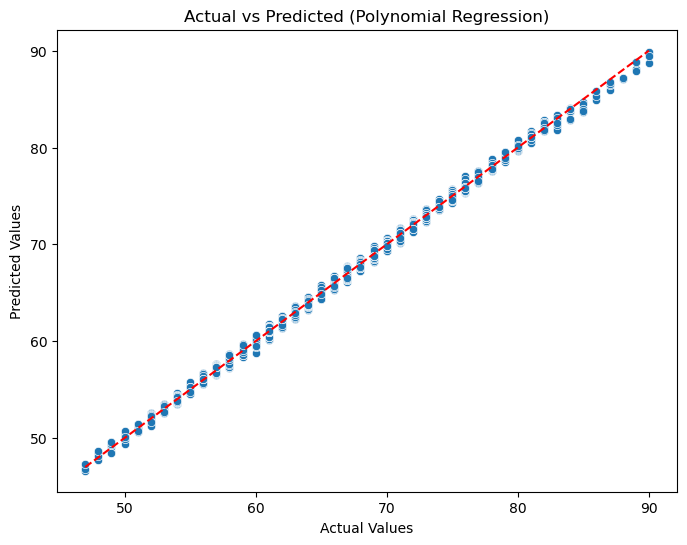

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Polynomial Regression)")

Text(0.5, 1.0, 'Residuals Plot (Polynomial Regression)')

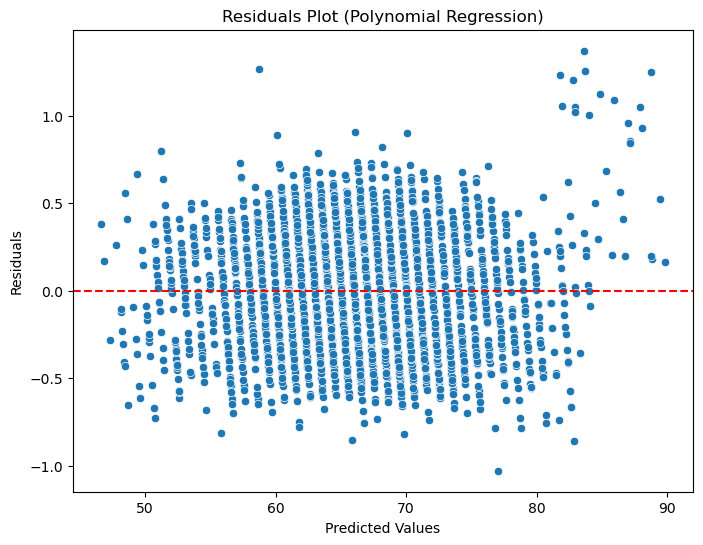

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Polynomial Regression)")